In [1]:
import numpy as np 
import pandas as pd
import pickle, glob
import sys
sys.path.append('/Users/tong/soundscape_IR/soundscape_viewer')

from soundscape_viewer import lts_viewer
from soundscape_viewer import gdrive_handle
from source_separation import pcnmf
from soundscape_viewer import data_organize, clustering
from source_separation import source_separation
from utility import matrix_operation
import interactive
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

/Volumes/home-1/DataBase/PAM_pickle/2023/
['/Volumes/home-1/DataBase/PAM_pickle/2023/Keelung_041712-050311-5min.pkl', '/Volumes/home-1/DataBase/PAM_pickle/2023/Keelung_060909-062522-5min.pkl', '/Volumes/home-1/DataBase/PAM_pickle/2023/Keelung_082912-091404-5min.pkl', '/Volumes/home-1/DataBase/PAM_pickle/2023/Keelung_121508-010612-5min.pkl']
Loading file: /Volumes/home-1/DataBase/PAM_pickle/2023/Keelung_041712-050311-5min.pkl
(4603, 512)
Loading file: /Volumes/home-1/DataBase/PAM_pickle/2023/Keelung_060909-062522-5min.pkl
(4776, 512)
Loading file: /Volumes/home-1/DataBase/PAM_pickle/2023/Keelung_082912-091404-5min.pkl
(4524, 512)
Loading file: /Volumes/home-1/DataBase/PAM_pickle/2023/Keelung_121508-010612-5min.pkl
(6396, 512)
(20299, 511)


(<Figure size 2000x300 with 2 Axes>, <Axes: ylabel='Frequency'>)

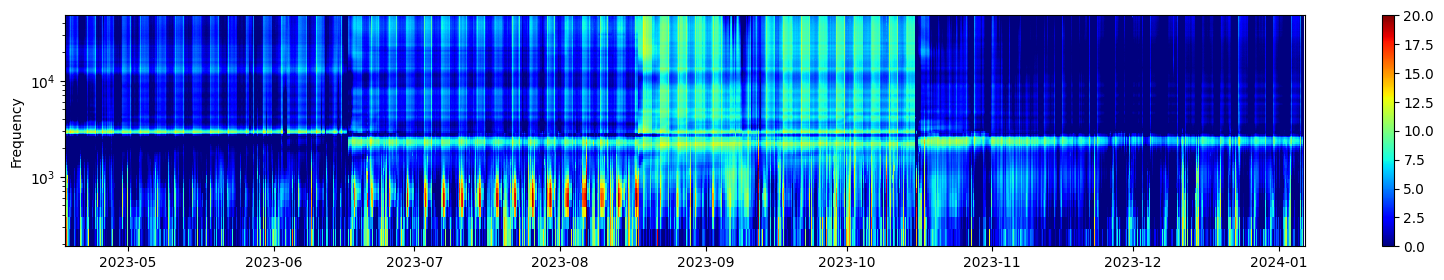

In [2]:
place = 'Keelung'
year = 2023
LTS=lts_viewer(path=f'/Volumes/home-1/DataBase/PAM_pickle/{year}/', place=place)
input_data, f, time = LTS.input_selection('median', prewhiten_percent=20, f_range=[100,48000])#

if f.shape[0] == 510:
    modified_f = []

    for i in range(int(f.shape[0]/2)):
        ii = 2*i+1
        modified_f.append(f[ii])
    modified_f = np.array(modified_f)
    
    modified_input_data = np.zeros([input_data.shape[0], int(f.shape[0]/2)])
    for j in range(input_data.shape[0]):
        for i in  range(int(f.shape[0]/2)):
            modified_input_data[j,i] = input_data[j,2*i+1]
            
    if modified_f.shape[0] == 255 and modified_input_data.shape[1] == 255:
        f = modified_f
        input_data = modified_input_data
        clear_model_W = True 
        print()
        print('downsampling frequency ')
        print(input_data.shape)
        print()

if time.shape[0] > input_data.shape[0]:
    print('time problem')
    time = time[1:]
    
matrix_operation().plot_lts(input_data, f, time, vmin=0, vmax=20, fig_width=20, fig_height=3, lts=False)

In [3]:
if place == 'Keelung':
    print(place)
    stages= 4 if year == 2023 else 3
    # file = open('../Results/soundsepration/Keelung/20231116_151017_3stages_separation/model_array.pkl' , 'rb')
    path = glob.glob(f'../Results/soundsepration/Keelung-5min/202?*_{year}_{stages}stage_separation/model_array.pkl')[0]
    print(path)
    file = open(path , 'rb')
    model = pickle.load(file)
    file.close()
elif place == 'Taoyuan':
    print(place)
    # 30 min resolution
    # file = open('../Results/soundsepration/Taoyuan/20231120_112318_3stage_separation_combined/model_array.pkl' , 'rb')
    # 5 min resolution 
    
    stages = 4 if year == 2023 else 3
    path = glob.glob(f'../Results/soundsepration/Taoyuan-5min/202?*_{year}_{stages}stage_separation/model_array.pkl')[0]
    print(path)
    file = open(path , 'rb')
    model = pickle.load(file)
    file.close()
    
    if year == 2022:
        import datetime
        time = np.hstack([time, datetime.datetime(2022, 8, 25, 16, 55)])        

Keelung
../Results/soundsepration/Keelung-5min/20240125_160851_2023_4stage_separation/model_array.pkl


In [5]:
save = False

analysis_result=data_organize()
s = 1
print(f'Source: {s}; Fish ')
model['relative_level'][s-1]=model['relative_level'][s-1]-np.min(model['relative_level'][s-1])
model['relative_level'][s-1]=model['relative_level'][s-1]/np.max(model['relative_level'][s-1])
analysis_result.time_fill(time_vec=time, data=model['relative_level'][s-1], header=f'S{s}_level')
value_k = 0.90 if s == 0 else 0.95
cluster_result=clustering(pca_percent=0.95, k=value_k)
cluster_result.run(input_data=model['separation'][s-1], f=f, time=time,standardization='max-min')    #
if save:
    savepath = path.rsplit('/', 1)[0]
    cluster_result.save_cluster_feature(filename=f'{savepath}/{place}_S{s}_cluster_scene_features_nostd.csv')
analysis_result.time_fill(time_vec=cluster_result.time_vec, data=cluster_result.cluster, header=f'S{s}_Cluster')

print()
print()


# s = 3

# print(f'Source: {s}')
# model['relative_level'][s-1]=model['relative_level'][s-1]-np.min(model['relative_level'][s-1])
# model['relative_level'][s-1]=model['relative_level'][s-1]/np.max(model['relative_level'][s-1])
# analysis_result.time_fill(time_vec=time, data=model['relative_level'][s-1], header=f'S{s}_level')
# cluster_result=clustering(pca_percent=0.95, k=0.9)
# cluster_result.run(input_data=model['separation'][s-1], f=f, time=time)    #, standardization='max-min'
# if save:
#     cluster_result.save_cluster_feature(filename=f'../Results/soundsepration/{place}_S{s}_cluster_scene_features.csv')
# analysis_result.time_fill(time_vec=cluster_result.time_vec, data=cluster_result.cluster, header=f'S{s}_Cluster')

if save:
    analysis_result.save_csv(f'{savepath}/{place}_S{s}_cluster_nostd.csv')

A new spreadsheet has been created.
Source: 1; Fish 
dimension reduction by PCA ......


/Users/tong/soundscape_IR/soundscape_viewer/soundscape_viewer.py:1945: RuntimeWarning: invalid value encountered in divide
  input_data=np.divide(input_data, np.matlib.repmat(input_data.max(axis=1), input_data.shape[1], 1).T)


comp: 3, ratio:[0.88828788 0.04860629 0.03205255]
Begining to cluster ......
k: 1 , explained variation: 0.0
k: 2 , explained variation: 0.6749623185915831
k: 3 , explained variation: 0.8371947562112768
k: 4 , explained variation: 0.8722441163038098
k: 5 , explained variation: 0.895243601938453
k: 6 , explained variation: 0.9160882031214216
k: 7 , explained variation: 0.9313915223850664
k: 8 , explained variation: 0.9394813965861366
k: 9 , explained variation: 0.9474112501456776
k: 10 , explained variation: 0.9534658765405155
Final trial: run  10  clusters




## Plot plot_diurnal

Index(['Time', 'S1_level', 'S1_Cluster'], dtype='object')
264


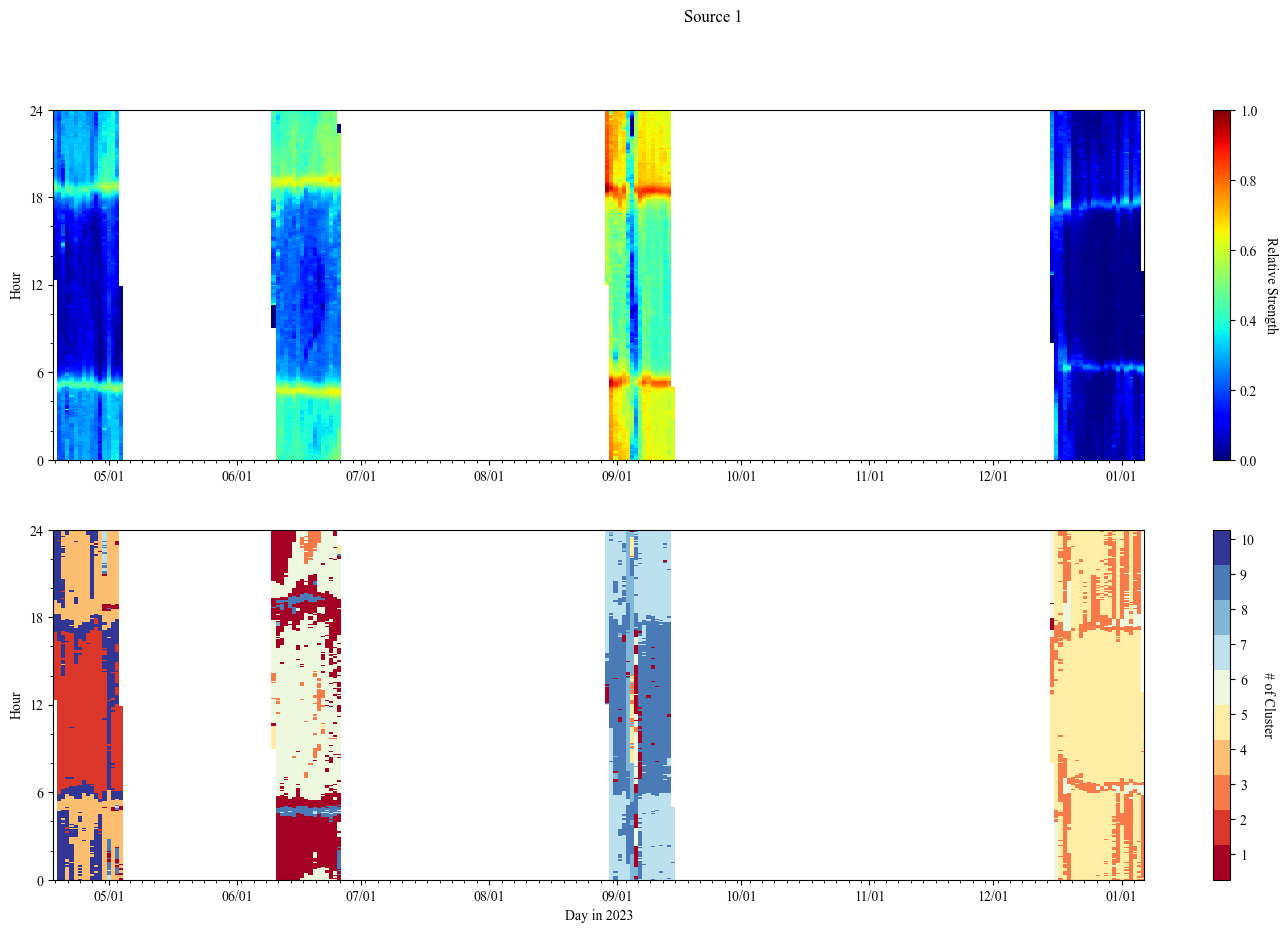

In [6]:
# Investigate the diurnal (y-axis) and seasonal change (x-axis) of source behavior
for i in [s]:# range(1, 5):
    if i  == 0 :
        level, cluster = analysis_result.plot_diurnal(col=i, savefig = save, vmax=0.3, vmin=0,
                                                 # file = f'{savepath}/{place}_{year}_diurnal_variations_nostd', 
                                                  nan_value=-1,
                                                  ) 
    else:
        level, cluster = analysis_result.plot_diurnal(col=i, savefig = save,
                                         # file = f'{savepath}/{place}_{year}_diurnal_variations_nostd', 
                                          nan_value=-1,
                                          ) 

In [ ]:
s